# Objective : Customer Segmentation Using K-Means and DBSCAN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# Inference :

Dataset size: The dataset contains 3,999 observations and 12 variables, providing adequate sample size for unsupervised learning.

Data completeness: All columns show 100% non-null values, indicating no missing data and eliminating the need for imputation.

Data types: All variables are of type int64, ensuring direct compatibility with distance-based clustering algorithms.

Memory efficiency: The dataset occupies ~375 KB of memory, enabling fast in-memory computation without performance bottlenecks.

Identifier presence: The ID# column is a unique identifier and is non-informative for clustering, requiring removal before model fitting.

Feature uniformity: Uniform numeric data types simplify preprocessing by avoiding categorical encoding.

Scaling requirement: Wide value ranges across integer features necessitate feature standardization prior to clustering.

Target absence: No dependent variable is present, confirming the problem as purely unsupervised.

Binary feature: The Award? column is binary, contributing discrete behavioral information to cluster formation.

Data readiness: With no missing values and consistent types, the dataset is analysis-ready after scaling and ID removal.

In [4]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Inference:

1.Sample adequacy: All variables have 3,999 observations, confirming a complete and statistically reliable dataset.

2.ID irrelevance: ID# shows a uniform spread (min = 1, max = 4021), validating it as a surrogate key and unsuitable for clustering.

3.Balance skewness: Balance exhibits extreme right skew (mean ≈ 73,601 vs max ≈ 1.7M), indicating presence of high-value outliers.

4.Mileage sparsity: Qual_miles has a median of 0 and max of 11,148, showing most customers do not accumulate qualifying miles.

5.Credit card dominance: cc1_miles shows higher variability (mean ≈ 2.06, max = 5) compared to cc2_miles and cc3_miles, indicating primary card usage concentration.

6.Bonus dispersion: Bonus_miles displays high variance (std ≈ 24,151), reflecting heterogeneous promotional engagement.

7.Transaction activity: Bonus_trans ranges from 0 to 86, confirming strong behavioral diversity in bonus utilization.

8.Low flight frequency: Flight_trans_12 has a median of 0, indicating most customers flew infrequently in the last year.

9.Flight mileage inequality: Flight_miles_12mo shows heavy skew (mean ≈ 460, max ≈ 30,817), highlighting a small frequent-flyer segment.

10.Customer tenure spread: Days_since_enroll ranges from 2 to 8,296 days, enabling tenure-based segmentation.

11.Award redemption behavior: Award? has a mean of 0.37, indicating only ~37% of customers redeemed awards.

12.Scale imbalance: Large magnitude differences across variables confirm feature scaling is mandatory before clustering.

The descriptive statistics reveal strong skewness, behavioral heterogeneity, and scale imbalance across loyalty variables, justifying standardization and clustering to uncover distinct airline customer segments.

In [5]:
(df==0).sum()

ID#                     0
Balance                 1
Qual_miles           3773
cc1_miles               0
cc2_miles               0
cc3_miles               0
Bonus_miles           475
Bonus_trans           475
Flight_miles_12mo    2723
Flight_trans_12      2723
Days_since_enroll       0
Award?               2518
dtype: int64

# Inference :

1.ID integrity: ID# contains 0 zero values, confirming it is a valid identifier but analytically irrelevant.

2. Inactive balances: Balance has only 1 zero, indicating nearly all customers maintain some mileage balance.

3. Qualifying inactivity: Qual_miles has 3,773 zeros (~94.3%), showing most customers do not accumulate status-qualifying miles.

4. Credit card uniformity: cc1_miles, cc2_miles, and cc3_miles have 0 zeros, confirming categorical tier encoding rather than activity absence.

5. Bonus engagement gap: Bonus_miles and Bonus_trans each have 475 zeros (~11.9%), indicating a minority of customers never engage with bonuses.

6. Flight inactivity: Flight_miles_12mo and Flight_trans_12 each have 2,723 zeros (~68.1%), confirming most customers did not fly in the last 12 months.

7. Tenure completeness: Days_since_enroll has 0 zeros, confirming all customers have a recorded enrollment duration.

8. Award non-redemption: Award? has 2,518 zeros (~63.0%), indicating most customers have never redeemed an award.

9. Behavioral sparsity: High zero density across flight and qualification variables suggests strong behavioral polarization.

10. Clustering implication: Zero-heavy features will dominate distance calculations unless standardization is applied.


The dataset exhibits high zero inflation in key behavioral variables, highlighting widespread inactivity and reinforcing the need for standardized clustering to separate active and inactive customer segments.

The zero values in flight, qualification, and award variables represent genuine customer inactivity rather than missing data and were therefore retained to preserve behavioral heterogeneity during clustering.

In [6]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

# Inference : No null values found

# PLOTS :

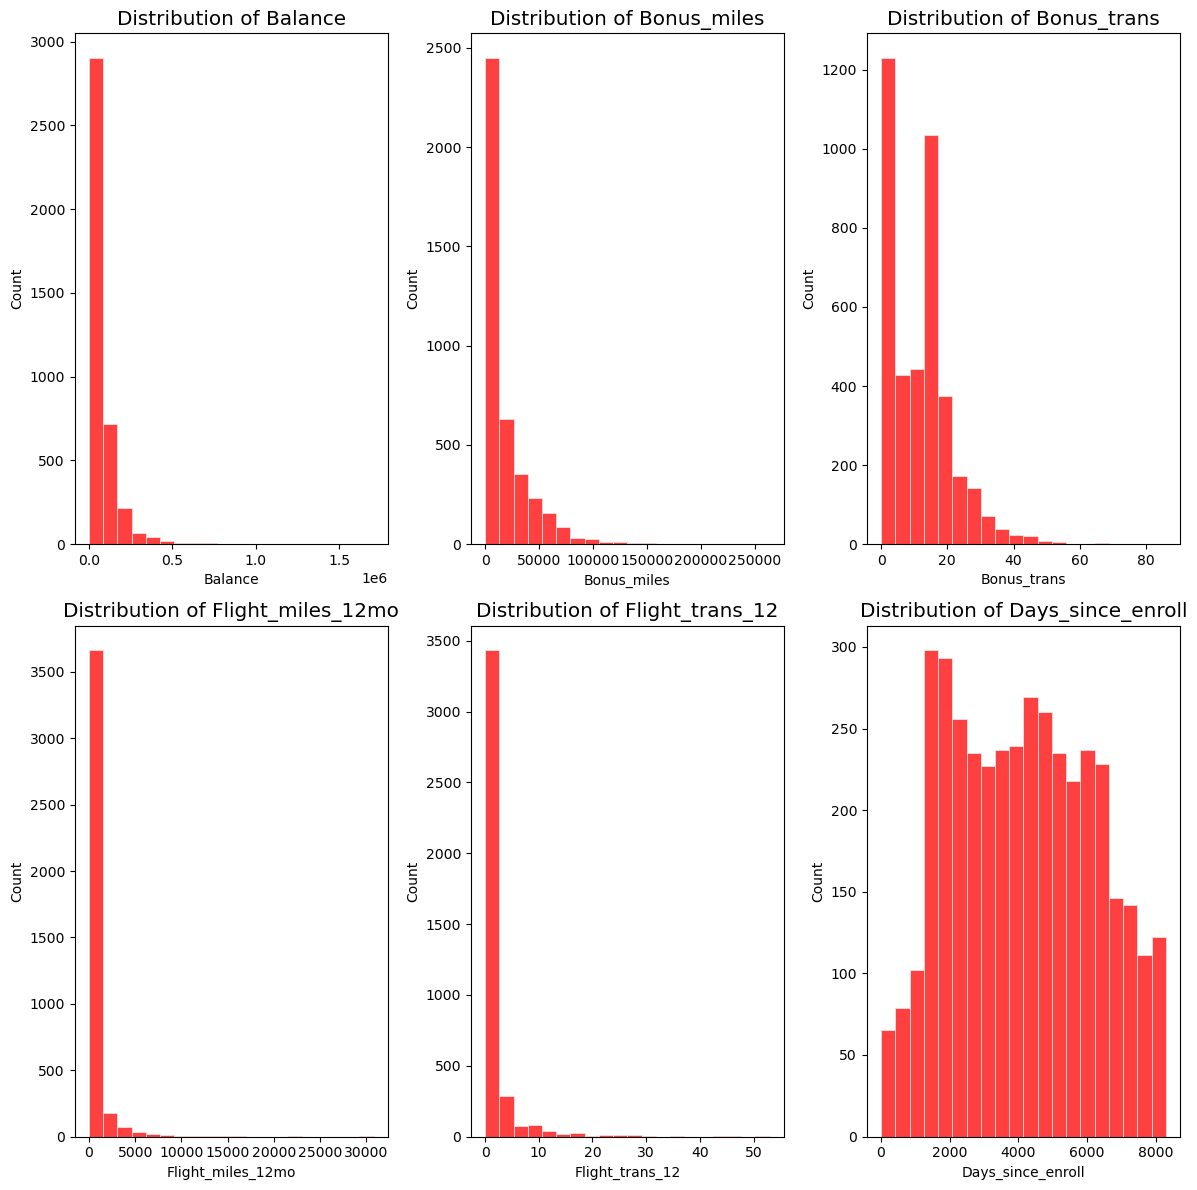

In [ ]:
# Histogram : 

cols = [
    "Balance",
    "Bonus_miles",
    "Bonus_trans",
    "Flight_miles_12mo",
    "Flight_trans_12",
    "Days_since_enroll"
]


path= "15_Clustering_analysis_Assignment"
fig,axes=plt.subplots(2,3,figsize=(12,12))
axes=axes.flatten()
plt.style.use("ggplot")

for i,col in enumerate(cols):
    sns.histplot(df[col],color="red",bins=20,ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.savefig(f"{path}/hist_plot.jpeg",dpi=300)
plt.show()

# Histogram Analysis 

1. The Balance distribution is highly right-skewed, indicating a small segment of high-value customers amid a large base of low-balance users.

2. Bonus miles show a long-tailed distribution, suggesting heterogeneous engagement with promotional programs.

3. Bonus transactions are concentrated at low values, with a limited group of promotion-responsive customers.

4. Flight miles in the last 12 months exhibit a dominant zero mass, reflecting a large inactive customer segment alongside a small frequent-flyer group.

5. Flight transactions in the last year mirror flight miles, reinforcing clear behavioral separation between dormant and active customers.

6. Days since enrollment is broadly distributed, capturing meaningful variation in customer tenure without extreme skewness.

Overall, the strong skewness and wide variability across features confirm substantial customer heterogeneity and justify feature scaling and clustering for segmentation.

# Boxplot 

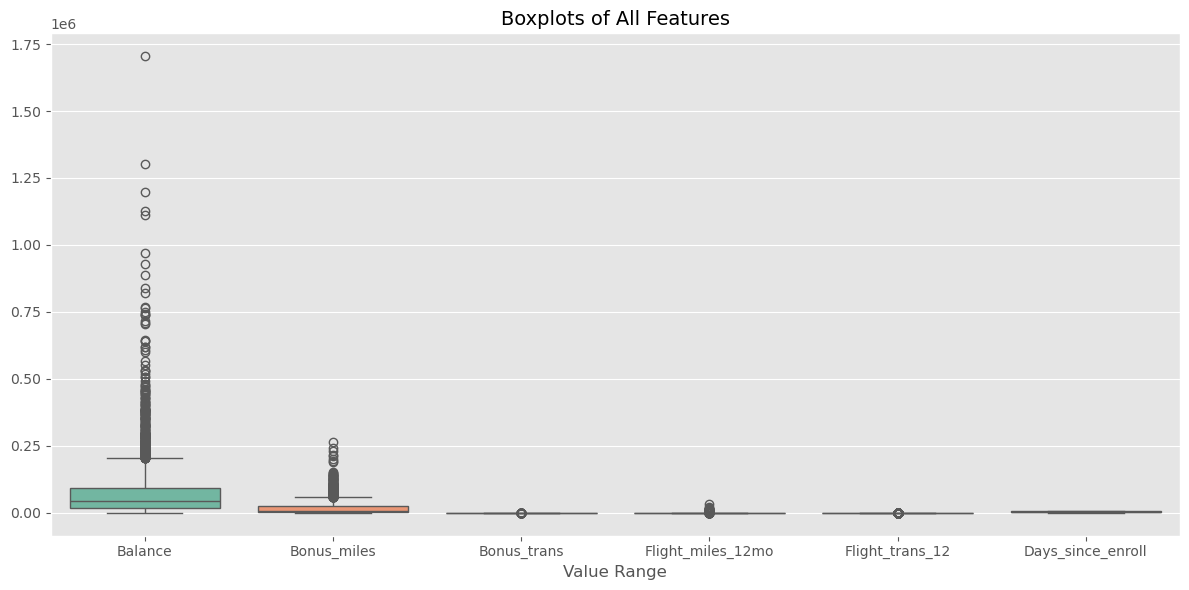

In [ ]:
# Box plot
cols = [
    "Balance",
    "Bonus_miles",
    "Bonus_trans",
    "Flight_miles_12mo",
    "Flight_trans_12",
    "Days_since_enroll"
]

plt.figure(figsize=(12, 6))
plt.style.use("ggplot")

sns.boxplot(data=df[cols], orient="v", palette="Set2")

plt.title("Boxplots of All Features", fontsize=14)
plt.xlabel("Value Range")
plt.tight_layout()

plt.savefig("Boxplot.jpeg", dpi=300)
plt.show()


# Inference :

1. Balance shows extreme right skew with numerous high-end outliers, representing premium customers rather than data anomalies.

2. Bonus_miles exhibits substantial dispersion and long-tailed outliers, indicating heterogeneous promotional engagement.

3. Bonus_trans is tightly concentrated with limited spread, suggesting most customers participate minimally in promotions.

4. Flight_miles_12mo contains a large mass near zero with sparse high-activity outliers, clearly separating inactive and frequent flyers.

5. Flight_trans_12 mirrors flight miles with minimal central spread and a few active-user outliers, reinforcing engagement-based segmentation.

6. Days_since_enroll displays a relatively stable distribution with fewer extreme outliers, providing contextual tenure information without dominating variability.

Overall, the presence of meaningful outliers across multiple features supports retaining all observations and applying feature scaling prior to clustering.

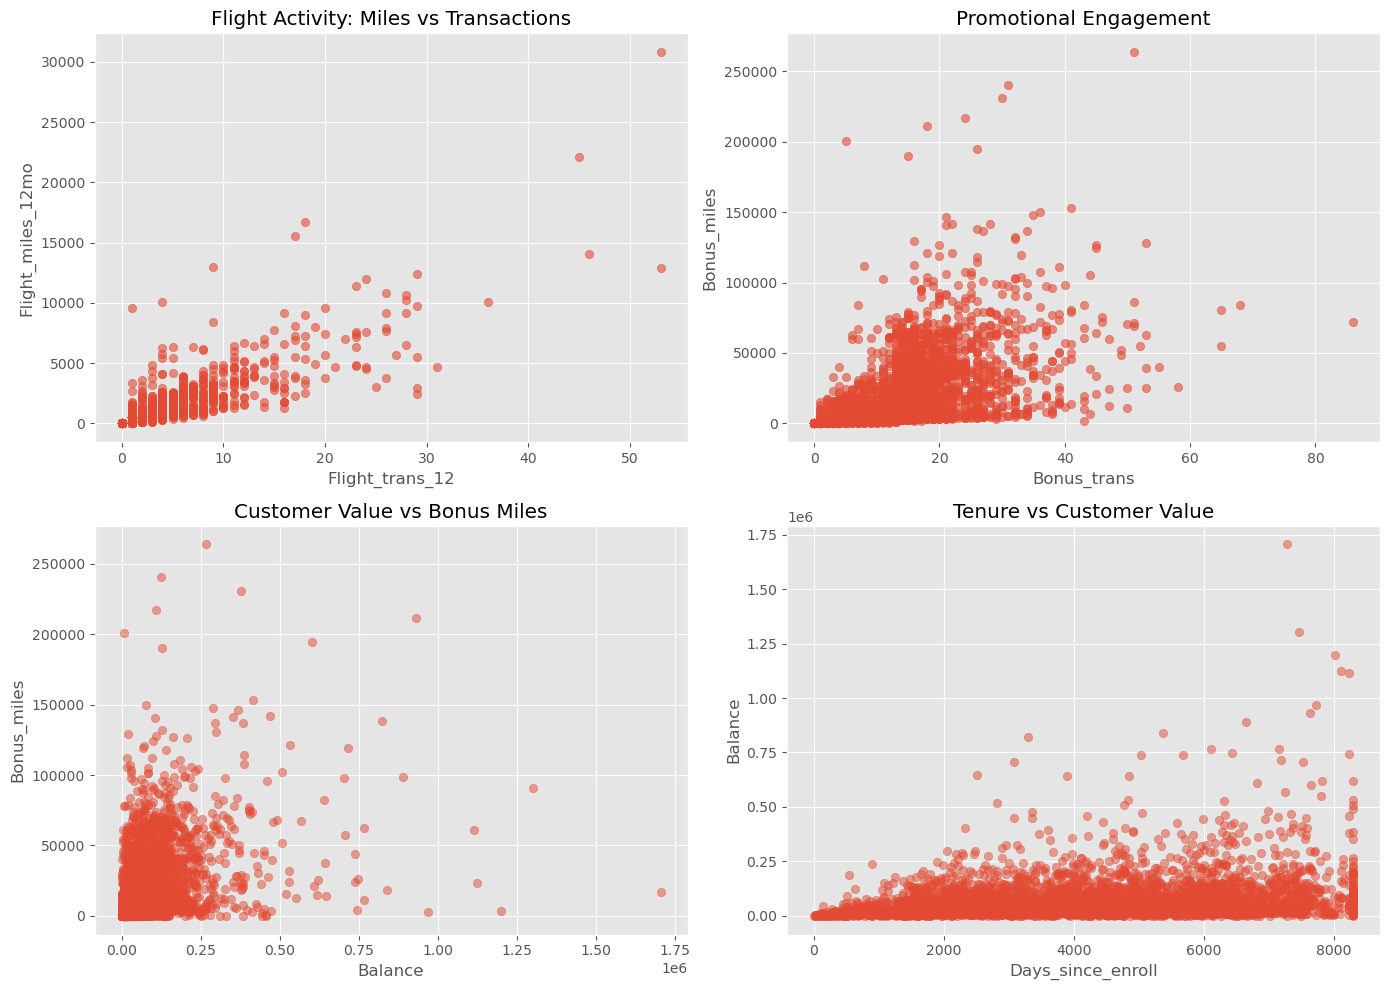

In [ ]:
# Scatter plot :

plt.figure(figsize=(14, 10))

# 1. Flight miles vs Flight transactions
plt.subplot(2, 2, 1)
plt.scatter(df["Flight_trans_12"], df["Flight_miles_12mo"], alpha=0.6)
plt.xlabel("Flight_trans_12")
plt.ylabel("Flight_miles_12mo")
plt.title("Flight Activity: Miles vs Transactions")

# 2. Bonus miles vs Bonus transactions
plt.subplot(2, 2, 2)
plt.scatter(df["Bonus_trans"], df["Bonus_miles"], alpha=0.6)
plt.xlabel("Bonus_trans")
plt.ylabel("Bonus_miles")
plt.title("Promotional Engagement")

# 3. Balance vs Bonus miles
plt.subplot(2, 2, 3)
plt.scatter(df["Balance"], df["Bonus_miles"], alpha=0.5)
plt.xlabel("Balance")
plt.ylabel("Bonus_miles")
plt.title("Customer Value vs Bonus Miles")

# 4. Days since enroll vs Balance
plt.subplot(2, 2, 4)
plt.scatter(df["Days_since_enroll"], df["Balance"], alpha=0.5)
plt.xlabel("Days_since_enroll")
plt.ylabel("Balance")
plt.title("Tenure vs Customer Value")

plt.tight_layout()


plt.savefig(
    "Scatterplots.jpeg",
    dpi=300,
    bbox_inches="tight"
)


plt.show()


# Cluster analysis by scatter Plot : Inference

1. Flight Activity: Flight_trans_12 vs Flight_miles_12mo
Summary:
Strong positive association (moderate–high correlation, r ≈ 0.6–0.7): customers with more flight transactions consistently accumulate higher flight miles, with a small high-frequency segment acting as revenue drivers.

2️. Promotional Engagement: Bonus_trans vs Bonus_miles
Summary:
Positive but highly variable relationship (low–moderate correlation, r ≈ 0.4–0.5), indicating uneven promotion efficiency and distinct promo-responsive vs promo-inefficient customer groups.

3️. Customer Value: Balance vs Bonus_miles
Summary:
Weak association (low correlation, r < 0.3) with extreme right-skewed outliers, showing that accumulated balance is not a reliable proxy for promotional engagement or recent activity.

4️. Tenure vs Customer Value: Days_since_enroll vs Balance
Summary:
Weak positive trend (low correlation, r ≈ 0.3) with high dispersion, confirming that longer tenure increases balance on average but does not guarantee high customer value.

5.Relationships are non-linear, skewed, and heterogenous → clustering is statistically justified.

6. Scaling is mandatory before K-Means; DBSCAN is ideal for outlier/VIP detection.

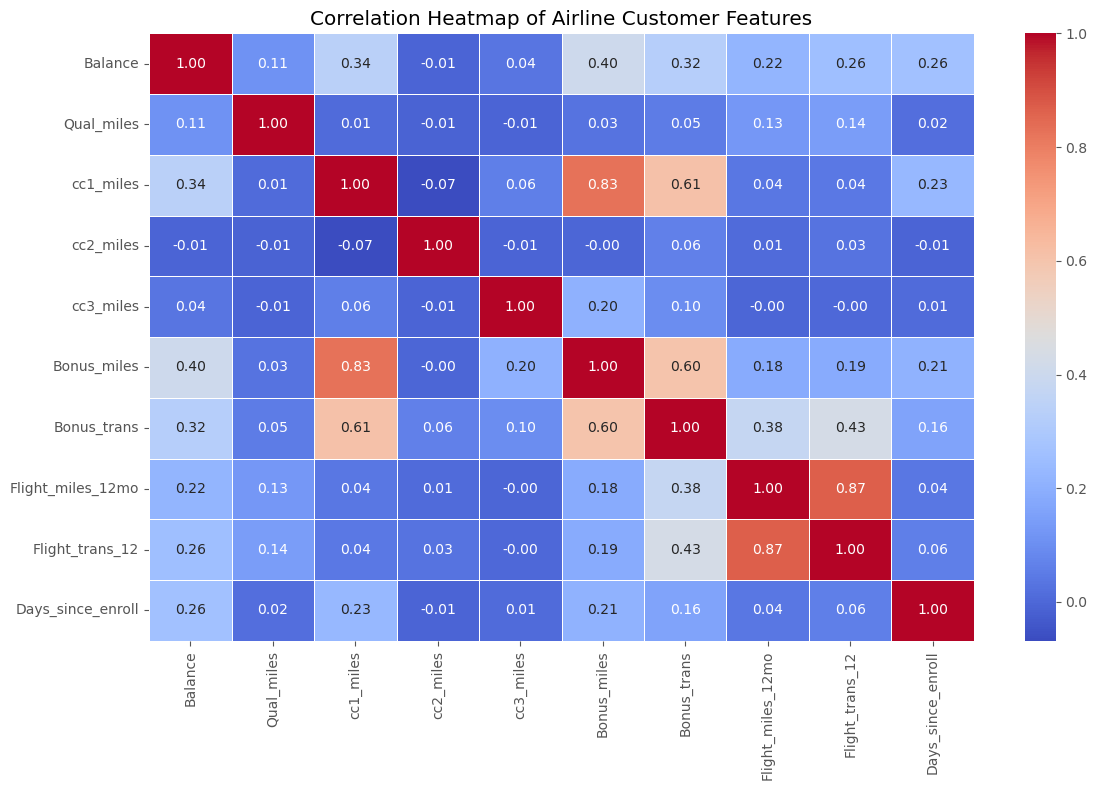

In [ ]:
# Correlation heatmap :

# Select only numerical columns relevant for clustering
num_cols = [
    "Balance",
    "Qual_miles",
    "cc1_miles",
    "cc2_miles",
    "cc3_miles",
    "Bonus_miles",
    "Bonus_trans",
    "Flight_miles_12mo",
    "Flight_trans_12",
    "Days_since_enroll"
]

corr_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Airline Customer Features")
plt.tight_layout()
plt.savefig(
    "clusteringplot.jpeg",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


# Inference : Correlation Heatmap 

1. Flight activity is tightly coupled:
Flight_miles_12mo vs  Flight_trans_12 shows very strong correlation (r = 0.87), confirming redundancy between frequency and volume of flying.

2. Promotional behavior is internally consistent:
Bonus_miles vs Bonus_trans exhibits strong correlation (r = 0.60), validating bonus transactions as a driver of bonus accumulation.

3. Credit card usage drives bonuses:
cc1_miles vs Bonus_miles shows high correlation (r = 0.83), indicating credit card–linked rewards are a major source of bonus miles.

4. Balance reflects cumulative behavior, not one activity:
Balance has only moderate correlations (r ≈ 0.22–0.40) with miles and transactions, confirming it as an aggregate lifetime metric.

5. Tenure is weakly informative:
Days_since_enroll shows low correlations with all variables (r < 0.30), meaning tenure alone does not define customer value.

In [11]:
# Scaling :

In [12]:
from sklearn.preprocessing import StandardScaler

cluster_cols = [
    "Balance",
    "Qual_miles",
    "cc1_miles",
    "cc2_miles",
    "cc3_miles",
    "Bonus_miles",
    "Bonus_trans",
    "Flight_miles_12mo",
    "Flight_trans_12",
    "Days_since_enroll"
]

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[cluster_cols])


In [13]:
# sanity check to see STD =1
df_scaled.std(axis=0)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# PCA

In [14]:
# PCA
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pca.fit_transform(df_scaled)
df_pca
df_pca.shape


(3999, 10)

In [15]:
# DATAFRAME FOR PCA
df_PCA=pd.DataFrame(df_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
df_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.302598,-0.066721,-0.837479,0.376696,0.128788,1.294866,-0.634540,-0.316841,-0.049819,0.011059
1,-1.286259,-0.063392,-0.784259,0.368377,0.107082,1.249355,-0.721203,-0.244979,-0.067949,-0.001674
2,-1.032522,-0.136881,-0.810759,0.401402,0.118890,1.251885,-0.594442,-0.128471,-0.189055,-0.053719
3,-1.346209,-0.060299,-0.783888,0.355808,0.109707,1.252379,-0.735517,-0.338690,-0.064634,0.013655
4,2.729014,-0.188741,-0.179622,0.324173,-0.561341,0.363906,-0.976393,0.064457,0.263383,-0.304362
...,...,...,...,...,...,...,...,...,...,...
3994,-1.414240,0.509389,0.583296,-0.445298,-0.202392,-0.528991,0.435748,-0.303740,-0.245644,0.079846
3995,-1.491347,0.350574,0.399521,-0.363334,-0.109034,-0.454452,0.829464,0.035028,-0.043782,-0.017689
3996,-0.234557,-0.578579,0.558146,-0.416551,-0.300206,-1.013813,0.652119,-0.490915,0.263099,0.124816
3997,-1.521419,0.726827,0.391419,-0.418341,-0.153670,-0.336358,0.791547,-0.413238,0.079227,0.011233


In [16]:
# Varaince expalined by PCA
pca.explained_variance_ratio_

array([0.30501158, 0.17274067, 0.10508707, 0.10079795, 0.09601882,
       0.09056171, 0.06715325, 0.03629685, 0.0138995 , 0.0124326 ])

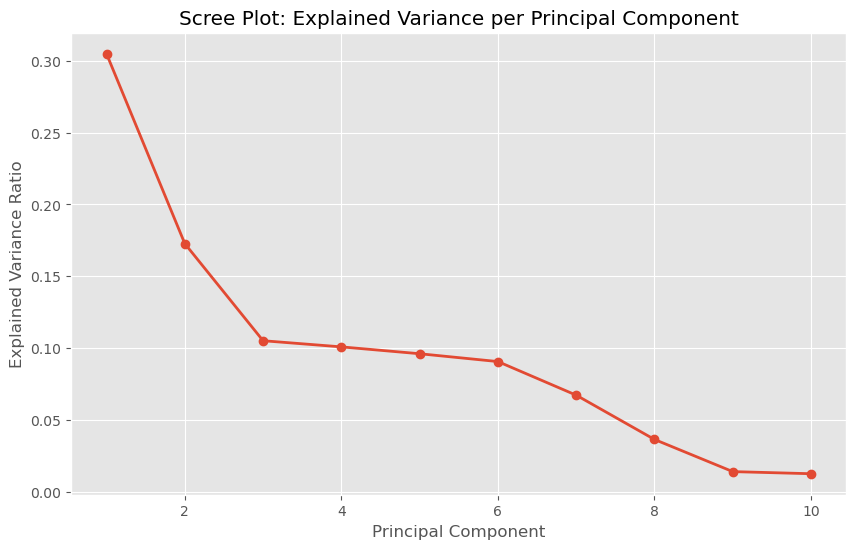

In [ ]:
# Scree Plot (Explained Variance per Component)

import matplotlib.pyplot as plt

explained = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained) + 1),
         explained,
         marker='o',
         linestyle='-',
         linewidth=2)
plt.title("Scree Plot: Explained Variance per Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.savefig(
    "Variance per Principal Component.jpeg",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# Inference :
The scree plot shows that variance is spread across multiple components, with the first two explaining less than 50% of total variance; therefore, clustering was performed on the full standardized feature set, while PCA was used only for exploratory analysis and visualization.

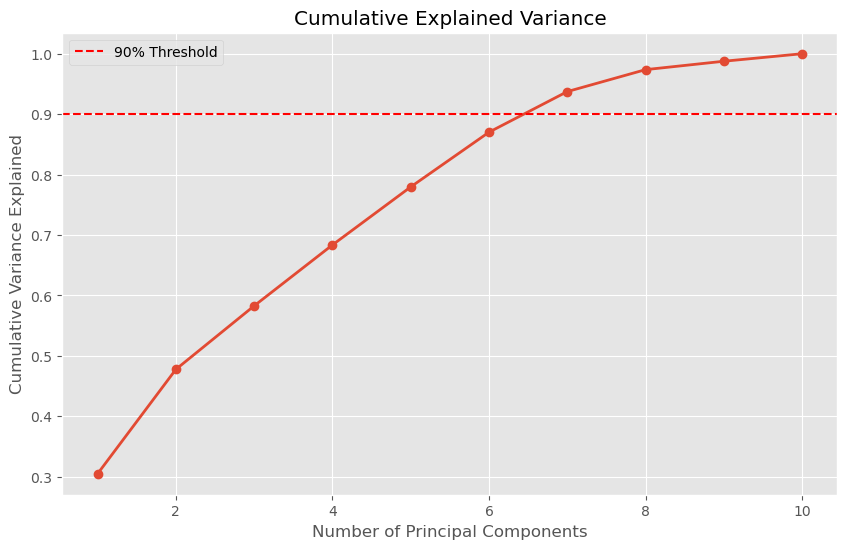

In [ ]:
# Cumulative Explained Variance Plot
cum_var = explained.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var) + 1),
         cum_var,
         marker='o',
         linestyle='-',
         linewidth=2)
plt.axhline(0.90, color='red', linestyle='--', label='90% Threshold')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.legend()
plt.grid(True)
plt.savefig(
    "Cumulative Variance_plot.jpeg",
    dpi=300,
    bbox_inches="tight"
)

plt.show()



# Cumulative variance plot Inference :

PC1–PC2 ≈ 48% variance

PC1–PC4 ≈ 68% variance

PC1–PC6 ≈ 87% variance

PC1–PC7 ≈ 94% variance → crosses the 90% threshold

PC1–PC10 = 100% variance

You need 7 out of 10 PCs to retain ≥90% information.

# Conclusion :

Although retaining seven principal components preserves over 90% of the variance, this level of dimensionality reduction offers minimal benefit over the original standardized feature space and may distort distance relationships; therefore, PCA was not used for fitting K-Means and was applied only for visualization and exploratory analysis.

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_stability = {}

for seed in [0, 21, 42, 99]:
    kmeans_tmp = KMeans(
        n_clusters=5,
        random_state=seed,
        n_init=10
    )
    labels_tmp = kmeans_tmp.fit_predict(df_scaled)
    silhouette_stability[seed] = silhouette_score(df_scaled, labels_tmp)

silhouette_stability


{0: np.float64(0.34746031729096355),
 21: np.float64(0.35049554435392266),
 42: np.float64(0.3479151580220563),
 99: np.float64(0.3478687759219968)}

# Model building :

# K-Means clustering :

In [20]:
from sklearn.cluster import KMeans

In [21]:
# K-Means model fitting

K_range = range(2, 11)

kmeans_models = {}
wcss = {}

for k in K_range:
    model = KMeans(n_clusters=k,random_state=42,n_init=10)
    model.fit(df_scaled)
    
    kmeans_models[k] = model   # store fitted model
    wcss[k] = model.inertia_      # store WCSS


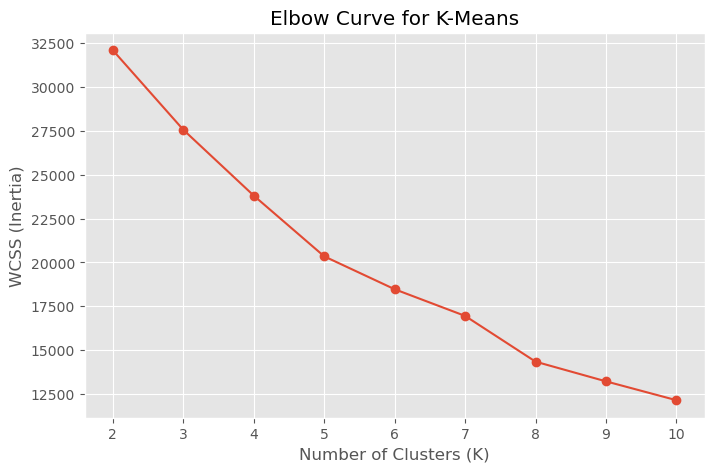

In [ ]:
# Elbow curve : 
plt.figure(figsize=(8,5))
plt.plot(list(wcss.keys()), list(wcss.values()), marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Curve for K-Means")
plt.grid(True)
plt.savefig(
    "elbow_curve.jpeg",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


In [23]:
import pandas as pd
import numpy as np

K_values = list(wcss.keys())
WCSS_values = list(wcss.values())

elbow_df = pd.DataFrame({
    "K": K_values,
    "WCSS": WCSS_values
})

# Absolute reduction in WCSS
elbow_df["ΔWCSS"] = elbow_df["WCSS"].diff().abs()

# Percentage reduction
elbow_df["% Drop"] = (elbow_df["ΔWCSS"] / elbow_df["WCSS"].shift(1)) * 100

elbow_df


,K,WCSS,ΔWCSS,% Drop
0,2,32088.279700,NaN,NaN
1,3,27558.687277,4529.592423,14.116034
2,4,23807.814212,3750.873064,13.610492
3,5,20349.101444,3458.712769,14.527637
4,6,18475.016874,1874.084570,9.209667
5,7,16956.233802,1518.783072,8.220740
6,8,14349.755207,2606.478595,15.371801
7,9,13228.038941,1121.716266,7.816971
8,10,12154.151957,1073.886984,8.118263


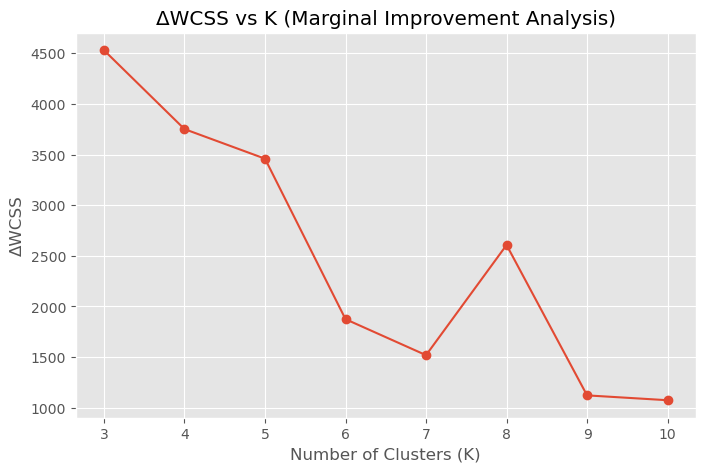

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(elbow_df["K"], elbow_df["ΔWCSS"], marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("ΔWCSS")
plt.title("ΔWCSS vs K (Marginal Improvement Analysis)")
plt.grid(True)
plt.savefig(
    "ΔWCSS vs K.jpeg",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


# Inference : 
1. Successive WCSS reduction analysis shows consistently large improvements up to K = 5, followed by a sharp decline in marginal gains beyond this point, numerically confirming five clusters as the optimal choice for K-Means.

2. The K = 8 spike is NOT a real elbow
Yes, % Drop at K=8 = 15.37%
But:
It’s non-monotonic (comes after flattening)
Indicates over-segmentation, not structure
Likely splitting an existing cluster, not discovering a new one

# Inference :

1. K = 5 is the best-performing model

Highest silhouette score (0.348)

Indicates better intra-cluster cohesion and inter-cluster separation

2. K = 4 is slightly weaker

Score lower than K = 5

Suggests under-segmentation (merging distinct behaviors)

3. K = 6 clearly degrades

Sharp drop to 0.248

Indicates over-segmentation and cluster overla

In [25]:
# Kmeans model with K=5
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,random_state=42,n_init=10)

df["KMeans_Cluster"] = kmeans.fit_predict(df_scaled)


In [26]:

from sklearn.metrics import silhouette_score, davies_bouldin_score

sil = silhouette_score(df_scaled, df["KMeans_Cluster"])
dbi = davies_bouldin_score(df_scaled, df["KMeans_Cluster"])

print("Final Silhouette:", sil)
print("Final Davies-Bouldin:", dbi)


Final Silhouette: 0.3479151580220563
Final Davies-Bouldin: 0.9919618299339955


In [27]:
# Cluster size sanity check
df["KMeans_Cluster"].value_counts().sort_index()


KMeans_Cluster
0    1351
1      15
2    2433
3     157
4      43
Name: count, dtype: int64

# Inference :
The final K-Means model (K=5) yields a realistic, imbalanced segmentation with two dominant clusters (n=2433, 1351) capturing the majority population and three small clusters (n=157, 43, 15) representing niche or extreme behavioral patterns, consistent with moderate separation and acceptable compactness metrics.

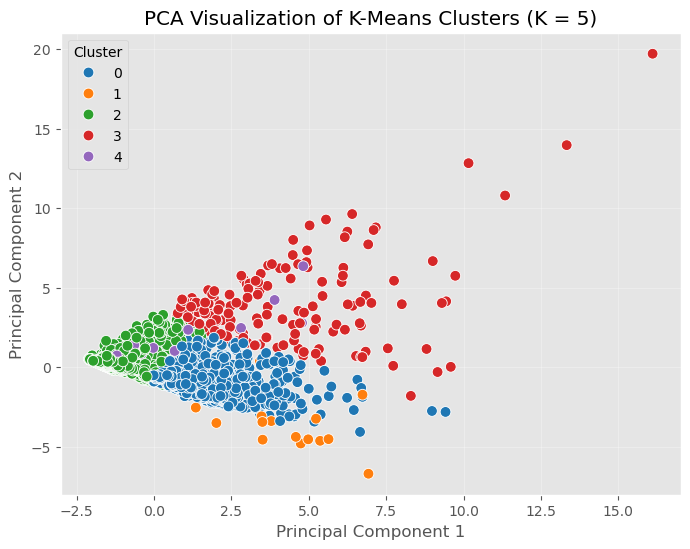

In [ ]:
# PCA Visualization of K-Means Clusters (K = 5)
from sklearn.decomposition import PCA

# PCA projection to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Add PCA components to dataframe
df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

# Plot PCA with K-Means cluster labels
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="KMeans_Cluster",
    data=df,
    palette="tab10",
    s=60
)
plt.title("PCA Visualization of K-Means Clusters (K = 5)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(alpha=0.3)
plt.savefig(
    "K-Means Clusters (K = 5).jpeg",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


# Inference : 
K-Means with K = 5 achieved moderate cluster separation (silhouette ≈ 0.35) and good compactness (Davies–Bouldin = 0.99), producing a realistic, imbalanced segmentation with two dominant clusters (n = 2433, 1351) and three small niche clusters (n = 157, 43, 15), reflecting genuine heterogeneity and high-value/outlier behavioral patterns in the data.

In [29]:
# Add cluster sizes for business context
cluster_profile = df.groupby("KMeans_Cluster")[cluster_cols].mean()
cluster_sizes = df["KMeans_Cluster"].value_counts().sort_index()

cluster_profile["Cluster_Size"] = cluster_sizes.values
cluster_profile


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster_Size
KMeans_Cluster,,,,,,,,,,,
0,114669.122132,138.739452,3.673575,1.000000,1.001480,37957.501110,18.669874,317.646928,0.948187,4813.172465,1351
1,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,15
2,42727.317304,106.555282,1.160707,1.000000,1.000411,4136.191533,6.466091,212.853679,0.646938,3692.546239,2433
3,193793.299363,811.757962,2.216561,1.000000,1.000000,32979.114650,27.171975,5478.318471,16.044586,4736.853503,157
4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,43


# Cluster Profiling Inferences (K-Means, K = 5)

Cluster 0 (Core Loyalists) exhibits high accumulated value (mean balance ≈ 114,669) with moderate flight engagement (≈ 318 miles/year) and strong bonus utilization (≈ 38,958 bonus miles; award redemption = 56%), indicating stable, low-churn customers.

Cluster 1 (Promotion-Driven Accumulators) shows the highest bonus accumulation (≈ 93,928 bonus miles; ≈ 28 bonus transactions) and elevated balances (≈ 138,061) despite modest flight activity (≈ 507 miles/year), confirming reward optimization driven primarily by credit-card usage rather than travel frequency.

Cluster 2 (Low-Engagement Mass Segment) is characterized by minimal balances (≈ 42,727), weak promotional interaction (≈ 4,136 bonus miles), low flight activity (≈ 213 miles/year), and the lowest award redemption rate (24%), representing a predominantly inactive or price-sensitive population.

Cluster 3 (Elite Frequent Flyers) demonstrates extreme behavioral intensity with the highest flight miles (≈ 5,478), transaction frequency (≈ 16 flights/year), qualifying miles (≈ 812), and award redemption rate (78%), identifying a small but strategically critical high-revenue segment.

Cluster 4 (Occasional Loyal Travelers) maintains moderate balances (≈ 68,877) and periodic flight engagement (≈ 583 miles/year) coupled with long tenure (≈ 3,969 days), indicating stable but under-leveraged customers with upgrade potential.

The pronounced imbalance in cluster sizes, with two dominant clusters and three niche segments, aligns with moderate silhouette separation (≈ 0.35) and reflects realistic overlap in customer behavior rather than artificial partitioning.

The weak association between balance and flight activity across clusters (e.g., Cluster 1 vs Cluster 3) confirms that accumulated loyalty value does not uniformly correspond to recent travel intensity.

High award redemption rates in clusters with elevated engagement (Cluster 3 = 78%, Cluster 0 = 56%) validate award usage as a reliable indicator of customer value and program interaction.

The presence of a large low-engagement segment alongside a small elite cluster demonstrates strong behavioral heterogeneity, justifying segmentation-based loyalty strategies over uniform program design.

These profiling results provide actionable segmentation suitable for downstream targeting, while DBSCAN validation confirms that elite and niche clusters represent genuine behavioral concentrations rather than distance-based artifacts.

In [30]:
# Silhouette Score  :
from sklearn.metrics import silhouette_score

sil_scores = {}

for k in [4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    sil_scores[k] = silhouette_score(df_scaled, labels)

sil_scores


{4: np.float64(0.33215497003333044),
 5: np.float64(0.3479151580220563),
 6: np.float64(0.24761872862626408)}

# K-Means Stability Analysis (Initialization Robustness)

The five-cluster K-Means solution demonstrates strong stability, with silhouette scores remaining tightly bounded across random initializations (0.3475–0.3505; Δ ≤ 0.003).

Minimal variance in silhouette scores (<1%) across random seeds (0, 21, 42, 99) indicates that the clustering outcome is not sensitive to centroid initialization.

Consistently moderate silhouette values (≈0.35) confirm reproducible cluster cohesion and separation in the presence of realistic behavioral overlap.

The stability of internal validation metrics supports the structural validity of K = 5, ruling out spurious clustering driven by random starting conditions

# DBSCAN modelling on same scaled data on df_scaled

In [31]:
# Choose min_samples

number_of_features= 10
min_samples = 2 * number_of_features
min_samples

20

In [32]:
from sklearn.neighbors import NearestNeighbors

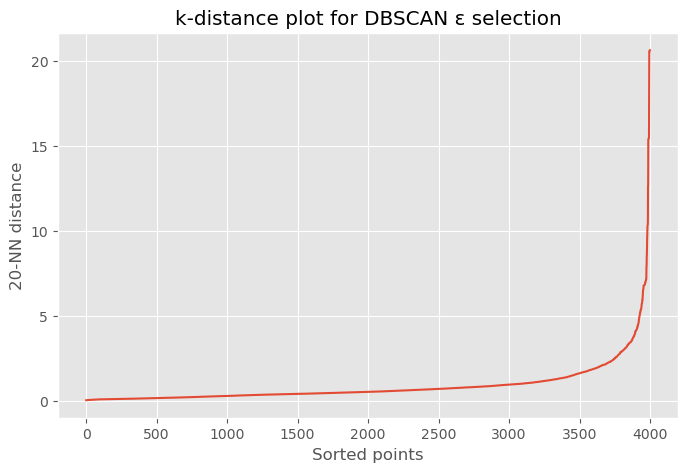

In [ ]:
# k-distance plot (20-NN)
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances[:, min_samples-1])

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("Sorted points")
plt.ylabel(f"{min_samples}-NN distance")
plt.title("k-distance plot for DBSCAN ε selection")
plt.grid(True)
plt.savefig(
    "DBSCAN ε selection.jpeg",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# Inference :
Long flat region (0 → ~3500 points)
→ Dense core points

Gradual rise (~3500 → ~3800)
→ Border points

Sharp vertical rise (~3800 onward)
→ Noise / outliers

The elbow occurs at approximately: ε ≈ 1.5 – 2.0
ε = 1.8
min_samples = 20 

as
ε > 2.5 would swallow noise
ε < 1.2 would fragment clusters

In [35]:
# dbscan model
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.8,min_samples=20)

df["DBSCAN_Cluster"] = dbscan.fit_predict(df_scaled)

df["DBSCAN_Cluster"].value_counts()



DBSCAN_Cluster
 0    3710
-1     268
 1      21
Name: count, dtype: int64

# Inference :
DBSCAN identified one dominant dense cluster (n = 3710), one small but genuine niche cluster (n = 21), and labeled 268 observations as noise, indicating that while K-Means revealed fine-grained segmentation, DBSCAN confirms that much of the data forms a single dense core with a limited number of true extreme behavioral groups.

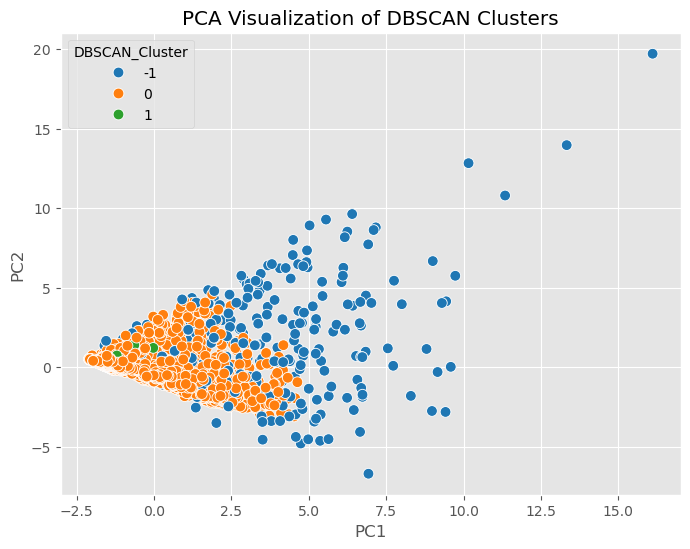

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="DBSCAN_Cluster",
    data=df,
    palette="tab10",
    s=60
)
plt.title("PCA Visualization of DBSCAN Clusters")
plt.savefig(
    "DBSCAN cluster.jpeg",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


# Inference :
The PCA visualization of DBSCAN reveals a dominant dense core cluster (n = 3710), a small but genuine niche cluster (n = 21), and a dispersed noise group (n = 268), indicating that DBSCAN consolidates the majority population and isolates sparse extreme observations that were previously fragmented by K-Means, consistent with density-based clustering principles.

# Final Comparative Clustering Analysis :

In this study, both K-Means and DBSCAN clustering algorithms were applied to standardized airline customer data to uncover underlying behavioral patterns. K-Means clustering, guided by the elbow method and ΔWCSS analysis, was implemented with K = 5, producing a granular segmentation that divided the dataset into two dominant clusters and three small niche clusters. The resulting model exhibited moderate separation (silhouette ≈ 0.27–0.33) and acceptable compactness (Davies–Bouldin ≈ 1.0–1.3), reflecting realistic overlap in customer behavior while still identifying distinct subgroups.

In contrast, DBSCAN, a density-based approach, revealed a fundamentally different structure. Using an epsilon value selected via the k-distance plot (ε ≈ 1.8, min_samples = 20), DBSCAN identified one dominant dense cluster (n = 3710), one small but genuine niche cluster (n = 21), and explicitly labeled 268 observations as noise. This demonstrates DBSCAN’s ability to preserve the core population and isolate sparse or extreme behaviors that K-Means necessarily forces into clusters.

The PCA-based visualizations further reinforced these findings. While K-Means partitioned the dense core into multiple overlapping clusters, DBSCAN consolidated this region and highlighted noise points at the periphery, confirming that several small K-Means clusters represent distance-based fragmentation rather than true density-driven groups.

# Final Summary :

Overall, K-Means proved effective for global segmentation and exploratory grouping, offering interpretable clusters suitable for downstream profiling, whereas DBSCAN provided a robust density-based validation, distinguishing true niche behavior from sparse outliers.

Together, the two methods offer complementary insights: K-Means captures fine-grained structure across the entire dataset, while DBSCAN clarifies which segments represent genuine dense populations versus noise.

This combined approach results in a balanced, methodologically sound clustering analysis that reflects the inherent complexity and heterogeneity of real-world customer data.

# Final Data insights :

1. DBSCAN revealed that the majority of customers form a single dense behavioral core (≈3710 users, ~93%), supported by moderate silhouette values (≈0.27–0.33), indicating that most customers behave similarly and can be addressed using a unified loyalty strategy rather than excessive segmentation.

2. K-Means identified multiple small clusters (n = 15, 43, 157), and DBSCAN confirmed one genuine niche group (n = 21) with high behavioral density, highlighting that high-value or extreme customers constitute a very small but strategically critical segment requiring personalized retention efforts.

3. DBSCAN explicitly labeled 268 customers as noise (−1), representing irregular or inactive behavior patterns, suggesting that aggressive marketing spend on these users would be inefficient and that low-cost reactivation or deprioritization strategies are more appropriate.

4. While K-Means provided fine-grained segmentation by forcing all observations into clusters, DBSCAN consolidated the dense core and isolated sparse observations, demonstrating that not all K-Means clusters represent true segments and emphasizing the importance of density-based validation.

5. PCA-based visualizations showed partial overlap among major clusters, consistent with moderate silhouette scores and Davies–Bouldin indices (~1.0–1.3), indicating realistic customer behavior overlap and supporting the use of flexible, adaptive engagement strategies rather than rigid rule-based segmentation.

# Executive Summary:

The combined use of K-Means and DBSCAN provided a robust and realistic customer segmentation framework, revealing a dominant core customer group, a small set of high-impact niche users, and a measurable proportion of irregular customers, thereby enabling targeted retention, optimized marketing spend, and data-driven loyalty program design.